### DATA DICTIONARY:

***CUST_ID:*** Credit card holder ID

***BALANCE:*** Monthly average balance (based on daily balance averages)

***BALANCE_FREQUENCY:*** Ratio of last 12 months with balance

***PURCHASES:*** Total purchase amount spent during last 12 months

***ONEOFF_PURCHASES:*** Total amount of one-off purchases

***INSTALLMENTS_PURCHASES:*** Total amount of installment purchases

***CASH_ADVANCE:*** Total cash-advance amount

***PURCHASES_ FREQUENCY:*** Frequency of purchases (Percent of months with at least one purchase)

***ONEOFF_PURCHASES_FREQUENCY:*** Frequency of one-off-purchases PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases

***CASH_ADVANCE_ FREQUENCY:*** Cash-Advance frequency

***AVERAGE_PURCHASE_TRX:*** Average amount per purchase transaction

***CASH_ADVANCE_TRX:*** Average amount per cash-advance transaction

***PURCHASES_TRX:*** Average amount per purchase transaction

***CREDIT_LIMIT:*** Credit limit

***PAYMENTS:*** Total payments (due amount paid by the customer to decrease their statement balance) in the period

***MINIMUM_PAYMENTS:*** Total minimum payments due in the period.

***PRC_FULL_PAYMEN:*** Percentage of months with full payment of the due statement balance

***TENURE:*** Number of months as a customer

### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Settings
pd.set_option('display.max_columns', None)

### Load data

In [3]:
# reading data into dataframe
data= pd.read_csv('Data for Associate DS.csv')

### Information about data set

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# Total number of missing values in the dataframe
print ("Missing values :  ", data.isnull().sum())

Missing values :   CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [7]:
# Intital descriptive analysis of data.
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Handling Missing Value 

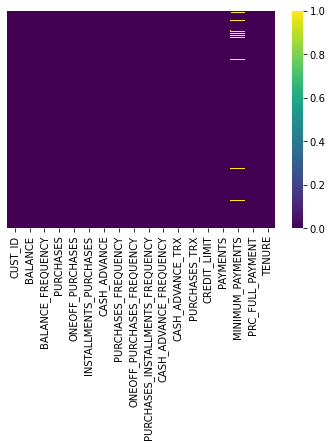

In [8]:
#checking null values by using heatmap
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

#### checking outliers for both the columns

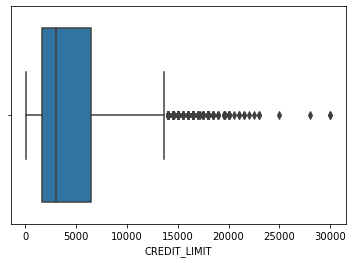

In [9]:
sns.boxplot(data['CREDIT_LIMIT'])

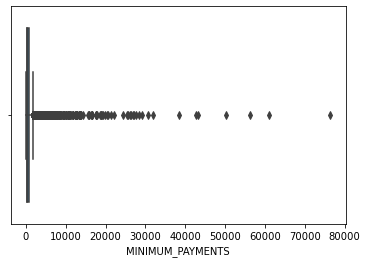

In [10]:
sns.boxplot(data['MINIMUM_PAYMENTS'])

In [11]:

# CREDIT_LIMIT  and MINIMUM_PAYMENTS have outliers so we need to fill null values with median.

data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(),inplace=True)

data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)

In [12]:
data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

### Deriving New KPI

***1. Monthly average purchase and cash advance amount***

#### Monthly_avg_purchase

In [14]:
data['Monthly_avg_purchase']=data['PURCHASES']/data['TENURE']

In [15]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333


#### Monthly_cash_advance Amount

In [16]:
data['Monthly_cash_advance']=data['CASH_ADVANCE']/data['TENURE']

#### 2- Purchases by type (one-off, installments)

- To find what type of purchases customers are making on credit card

In [18]:
data.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


#### Find customers ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES details

In [20]:
data[(data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [21]:
data[(data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [22]:
data[(data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [23]:
data[(data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

***As per above detail we found out that there are 4 types of purchase behaviour in the data set. So we need to derive a categorical variable based on their behaviour***

In [24]:
def purchase_type(data):
    if (data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_and_installment'
    if (data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'
    if (data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'

In [25]:
data['purchase_type']=data.apply(purchase_type,axis=1)

In [26]:
data['purchase_type'].value_counts()

both_oneoff_and_installment    2774
istallment                     2260
none                           2042
one_off                        1874
Name: purchase_type, dtype: int64

#### 4. Limit_usage (balance to credit limit ratio ) credit card utilization
   - Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [27]:
data['limit_usage']=data.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [28]:
data['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

####  Payments to minimum payments ratio etc.

In [30]:
data['payment_minpay']=data.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [31]:
data['payment_minpay'].head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: payment_minpay, dtype: float64

####  Extreme value Treatment
- Since there are variables having extreme values so I am doing log-transformation on the dataset to remove outlier effect 

In [32]:
# log tranformation
data_log=data.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [33]:
data_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [44]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=data_log[[x for x in data_log.columns if x not in col ]]

In [45]:
cr_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay'],
      dtype='object')

In [47]:
data_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay'],
      dtype='object')

### Insights from KPIs

#### Average payment_minpayment ratio for each purchse type.

In [48]:
x=data.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

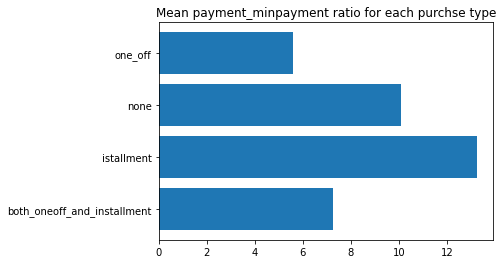

In [49]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values)
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')


#### customers with installment purchases are paying dues 

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

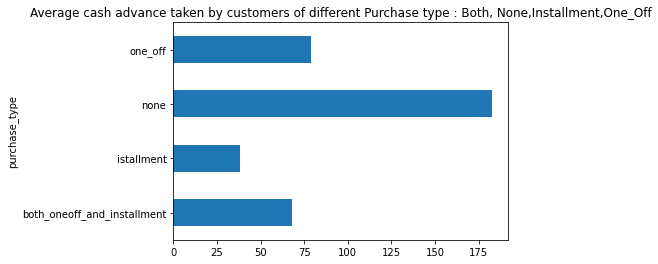

In [37]:
data.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

#### Customers who don't do either one-off or installment purchases take more cash on advance

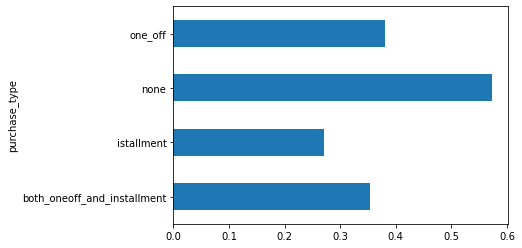

In [38]:
data.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

#### Original dataset with categorical column converted to number type.

In [51]:
data_original=pd.concat([data,pd.get_dummies(data['purchase_type'])],axis=1)

In [42]:
data_original.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay,both_oneoff_and_installment,istallment,none,one_off
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,istallment,0.040901,1.446508,0,1,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495,3.826241,0,0,1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off,0.332687,0.991682,0,0,0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,one_off,0.222223,0.000000,0,0,0,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off,0.681429,2.771075,0,0,0,1


### Preparing Machine learning algorithm

***We do have some categorical data which need to convert with the help of dummy creation***

In [53]:
# creating Dummies for categorical variable
cr_pre['purchase_type']=data.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'])

,both_oneoff_and_installment,istallment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


#### Now merge the created dummy with the original data frame

In [54]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)

In [55]:
l=['purchase_type']

In [56]:
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_avg_purchase                False
Monthly_cash_advance                False
limit_usage                         False
payment_minpay                      False
both_oneoff_and_installment         False
istallment                          False
none                                False
one_off                             False
dtype: bool

In [57]:
cr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   float64
 8   PURCHASES_TRX                     8950 non-null   float64
 9   Monthly_avg_purchase              8950 non-null   float64
 10  Monthly_cash_advance              8950 non-null   float64
 11  limit_usage                       8950 non-null   float64
 12  paymen

In [58]:
cr_dummy.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,both_oneoff_and_installment,istallment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,0,0,0,1


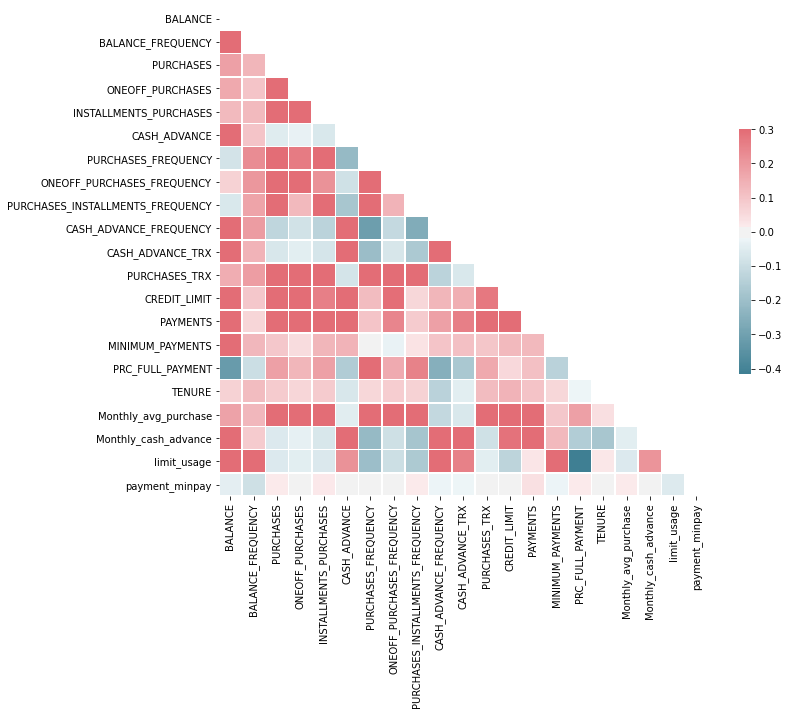

In [59]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<big>
- Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data
</big>


- Before applying PCA we will standardize data  to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

### Standardrizing data 
- To put data on the same scale 

In [60]:
from sklearn.preprocessing import  StandardScaler

In [61]:
sc=StandardScaler()

In [62]:
cr_dummy.shape

(8950, 17)

In [63]:
cr_scaled=sc.fit_transform(cr_dummy)

### Applying PCA

**With the help of principal component analysis we will reduce features**

In [64]:
from sklearn.decomposition import PCA

In [66]:
#We have 17 features so our n_component will be 17.
pc=PCA(n_components=17)
cr_pca=pc.fit(cr_scaled)

In [67]:
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

0.9999999999999999

In [68]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [69]:
var_ratio

{2: 0.5826439793960285,
 3: 0.7299379309512694,
 4: 0.811544276235125,
 5: 0.8770555795291431,
 6: 0.9186492443512613,
 7: 0.9410925256030133,
 8: 0.9616114053683059,
 9: 0.9739787081990646,
 10: 0.9835896584630706,
 11: 0.9897248107341953,
 12: 0.9927550009135239,
 13: 0.9953907562385419,
 14: 0.9979616898169593,
 15: 0.9996360473172954,
 16: 0.9999999999999999,
 17: 0.9999999999999999}

***Since 6 components are explaining about 90% variance so we select 5 components***

In [70]:
pc=PCA(n_components=6)

In [71]:
p=pc.fit(cr_scaled)

In [72]:
cr_scaled.shape

(8950, 17)

In [73]:
p.explained_variance_

array([6.83574755, 3.07030693, 2.50427698, 1.38746289, 1.1138166 ,
       0.70717132])

In [74]:
np.sum(p.explained_variance_)

15.618782269308795

In [75]:
np.sum(p.explained_variance_)

15.618782269308795

In [76]:
var_ratio

{2: 0.5826439793960285,
 3: 0.7299379309512694,
 4: 0.811544276235125,
 5: 0.8770555795291431,
 6: 0.9186492443512613,
 7: 0.9410925256030133,
 8: 0.9616114053683059,
 9: 0.9739787081990646,
 10: 0.9835896584630706,
 11: 0.9897248107341953,
 12: 0.9927550009135239,
 13: 0.9953907562385419,
 14: 0.9979616898169593,
 15: 0.9996360473172954,
 16: 0.9999999999999999,
 17: 0.9999999999999999}

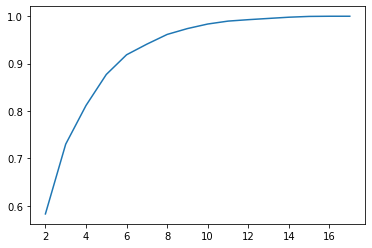

In [77]:
pd.Series(var_ratio).plot()

### ***Since 5 components are explaining about 85% variance so we select 6 components***

In [78]:
cr_scaled.shape

(8950, 17)

In [80]:
pc_final=PCA(n_components=6).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)

In [81]:
dd=pd.DataFrame(reduced_cr)

In [82]:
dd.head()

,0,1,2,3,4,5
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214


***So initially we had 17 variables now its 5 so our variable go reduced***

In [83]:
dd.shape

(8950, 6)

In [84]:
col_list=cr_dummy.columns

In [85]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_oneoff_and_installment', 'istallment', 'none', 'one_off'],
      dtype='object')

In [86]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681,-0.693816
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197,0.129094
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181,0.115223
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948,-0.081879
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279,-0.097299
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871,0.006731
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132,0.066589
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753,0.082307
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971,-0.009402
Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147,0.015878


#### So above data gave us eigen vector for each component we had all eigen vector value very small we can remove those variable bur in our case its not.

In [87]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
PC_5    0.041594
dtype: float64

### Clustering

**Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with 4 clusters.**

In [88]:
from sklearn.cluster import KMeans

In [89]:
km_4=KMeans(n_clusters=4,random_state=666)

In [90]:
km_4.fit(reduced_cr)

KMeans(n_clusters=4, random_state=666)

In [91]:
pd.Series(km_4.labels_).value_counts()

1    2769
0    2224
2    2088
3    1869
dtype: int64

***Here we donot have known k value so we will find the K. To do that we need to take a cluster range between 1 and 21.*** 

### Identify cluster Error.

In [92]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cr )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

In [93]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,139772.482528
1,2,93308.372278
2,3,70745.678848
3,4,49446.078418
4,5,42548.659651
5,6,37713.249106
6,7,34124.475243
7,8,31285.708963
8,9,28601.760807
9,10,26302.962482


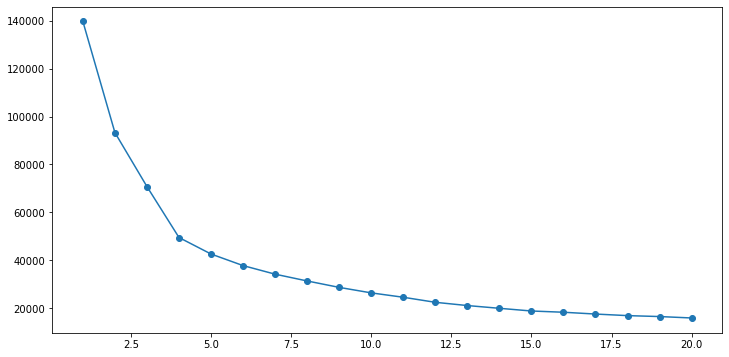

In [94]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

***From above graph we will find elbow range. here it is 4,5,6***

### Silhouette Coefficient

In [95]:
from sklearn import metrics

In [96]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

In [97]:
scores

[0.33113628388878247,
 0.354318111612054,
 0.437085774396595,
 0.4312227676966944,
 0.4226353763133637,
 0.39358545675991297,
 0.41805236796576223,
 0.38887744216754966,
 0.3934512405824182,
 0.3678772130648562,
 0.367000156240062,
 0.3513293979455327,
 0.3525965567774654,
 0.32956074855724693,
 0.33389461989573,
 0.3382071536512145,
 0.3354645505673166,
 0.33040681324630283,
 0.32159407885673597]

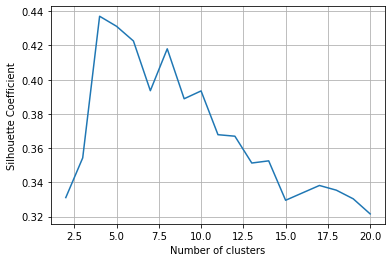

In [98]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

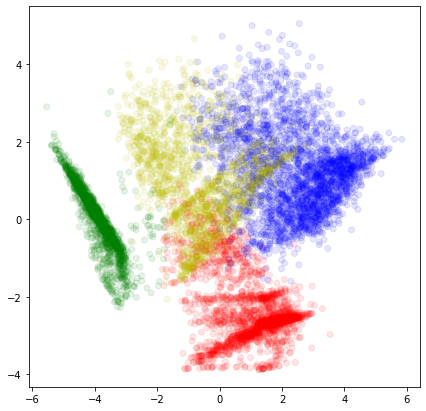

In [100]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.1)

***It is very difficult to draw iddividual plot for cluster, so we will use pair plot which will provide us all graph in one shot. To do that we need to take following steps***

In [101]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(6)])

In [102]:
df_pair_plot['Cluster']=km_4.labels_ #Add cluster column in the data frame

In [103]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755,0
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463,2
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932,3
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986,3
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214,3


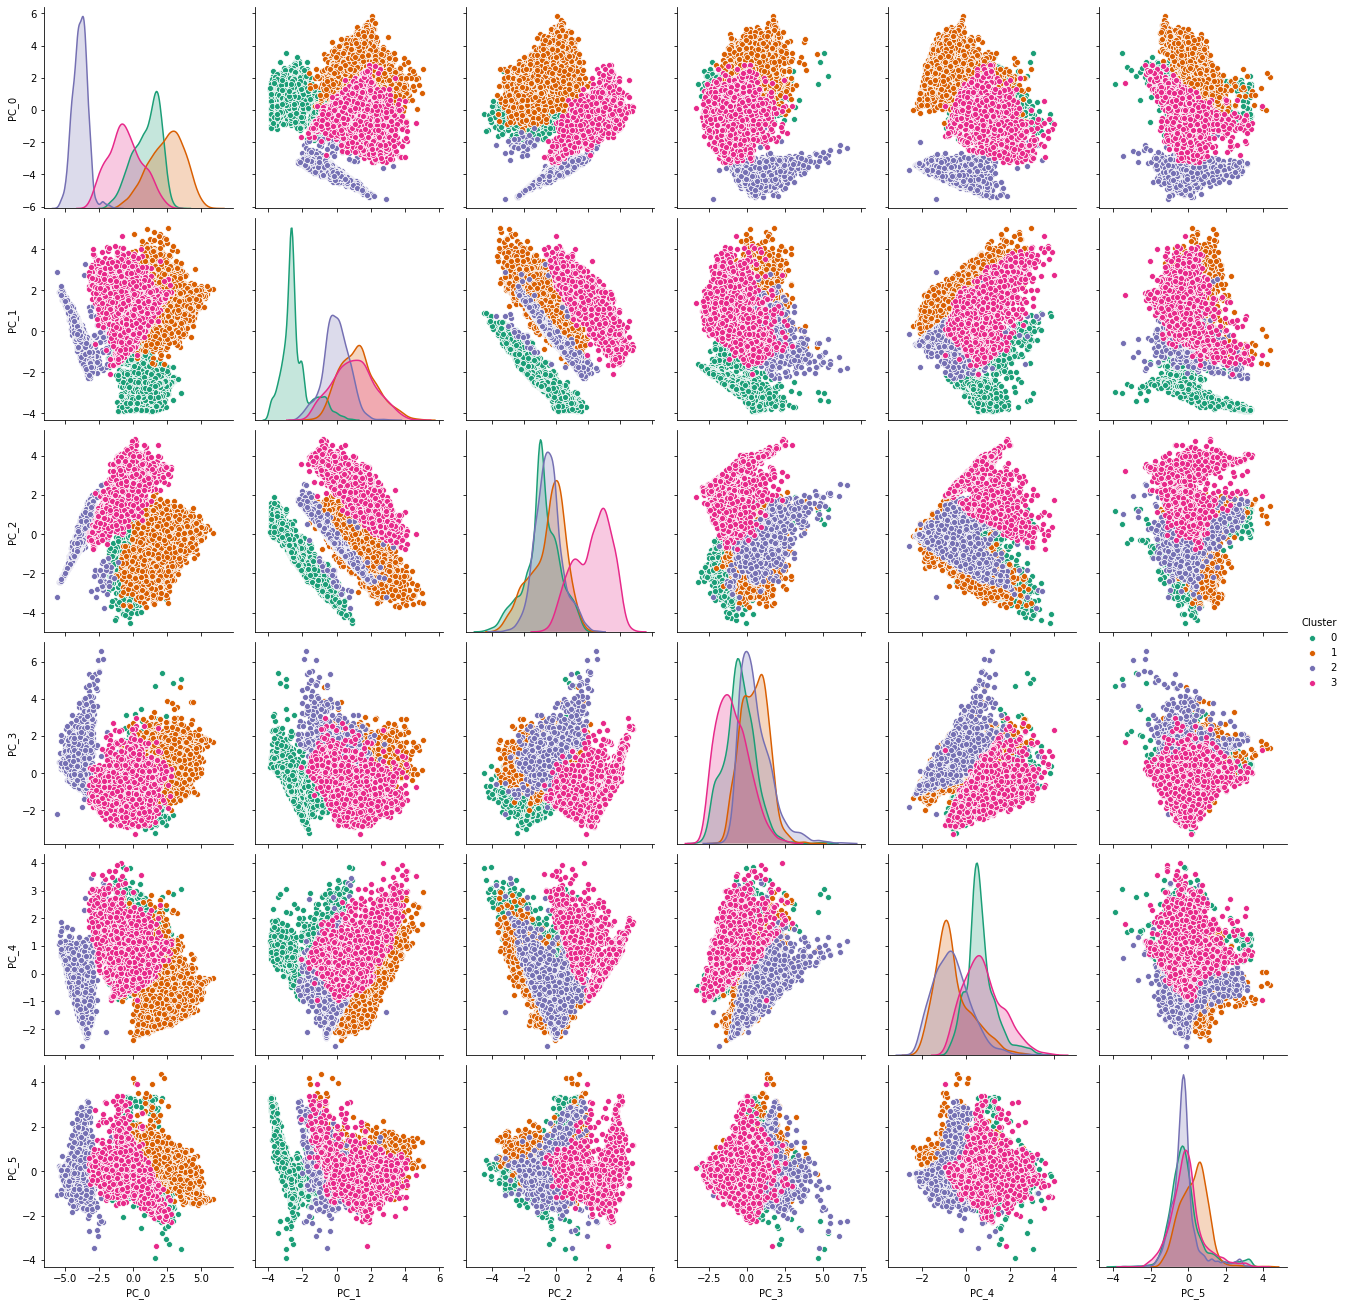

In [104]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',height=3)

***It shows that first two components are able to indentify clusters***

#### Now we have done here with priciple component now we need to come bring our original data frame and we will merge the cluster with them. 

***To interprate result we need to use our data frame***

In [109]:
# Key performace variable selection . here i am taking varibales which we will use in derving new KPI. 
#We can take all 17 variables but it will be difficult to interprate.So are are selecting less no of variables.

col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_and_installment','istallment','one_off','none','CREDIT_LIMIT']

In [106]:
cr_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [111]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([data_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [112]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_and_installment,istallment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,0
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,2
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,3
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,3
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,3


In [113]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,12.062050,33.013723,0.043582,7.127341
Monthly_avg_purchase,47.626256,193.008043,0.148297,69.875917
Monthly_cash_advance,33.550080,67.466910,186.281319,78.098613
limit_usage,0.264745,0.353591,0.576076,0.379761
CASH_ADVANCE_TRX,1.021133,2.804261,6.540230,2.881220
payment_minpay,13.422420,7.245651,9.936617,5.573672
both_oneoff_and_installment,0.000000,1.000000,0.001916,0.000535
istallment,1.000000,0.000000,0.017241,0.000000
one_off,0.000000,0.000000,0.002874,0.999465
none,0.000000,0.000000,0.977969,0.000000


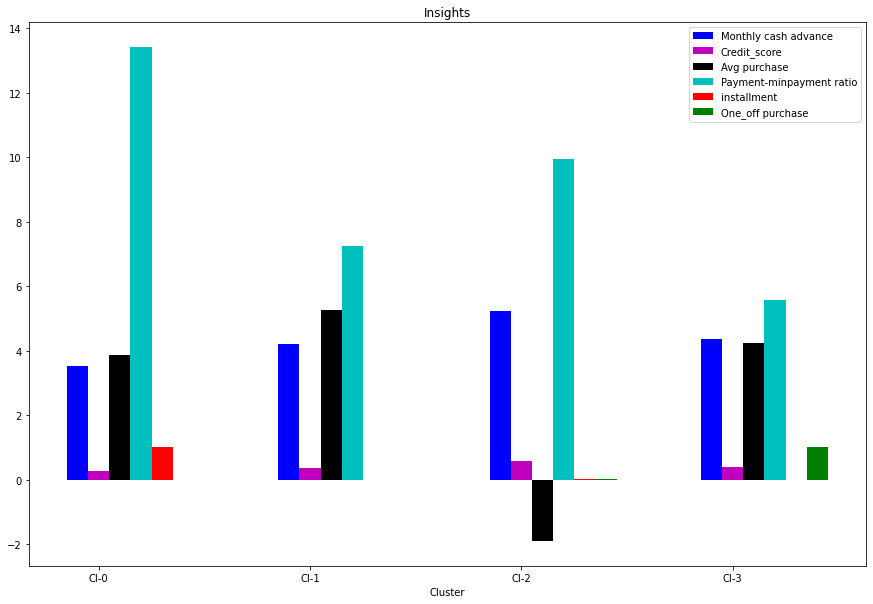

In [128]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['istallment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

**Insights**

#### Clusters are clearly distinguishing behavior within customers




<big>


- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. *** This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23% of the total customer base ***



- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio. *** This group is about 21% of the total customer base ***



- Cluster 3 customers have maximum credit score and  are paying dues and are doing maximum installment purchases. *** This group is about 25% of the total customer base ***


---



In [129]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4   
0          0    2224
1          1    2769
2          2    2088
3          3    1869
Name: Cluster_4, dtype: int64
Cluster -4 
   Size  Percentage
0  2224   24.849162
1  2769   30.938547
2  2088   23.329609
3  1869   20.882682


#### Finding behaviour with 5 Clusters:

In [131]:
km_5=KMeans(n_clusters=5,random_state=666)
km_5=km_5.fit(reduced_cr)

In [132]:
pd.Series(km_5.labels_).value_counts()

3    2149
1    2081
0    1978
2    1862
4     880
dtype: int64

Text(0, 0.5, 'PC_1')

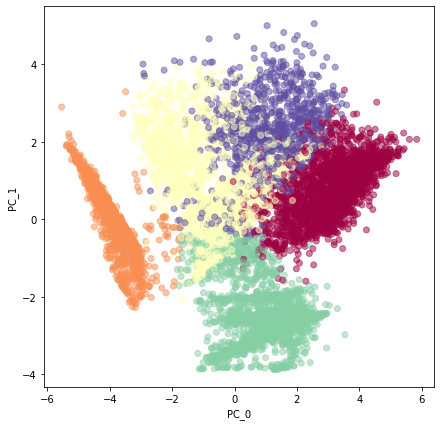

In [133]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [134]:
cluster_df_5=pd.concat([data_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [135]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,34.589990,0.032196,7.096670,11.905537,27.690909
Monthly_avg_purchase,210.467041,0.086126,68.917645,47.369817,141.661784
Monthly_cash_advance,4.046992,185.038534,74.517541,20.636870,250.207410
limit_usage,0.259179,0.576110,0.377959,0.250011,0.599928
CASH_ADVANCE_TRX,0.153185,6.448823,2.697637,0.550489,10.395455
payment_minpay,8.671695,9.963172,5.562287,13.783426,3.654527
both_oneoff_and_installment,1.000000,0.000000,0.002148,0.000000,0.900000
istallment,0.000000,0.015858,0.000000,1.000000,0.088636
one_off,0.000000,0.002883,0.997852,0.000000,0.011364
none,0.000000,0.981259,0.000000,0.000000,0.000000


### Conclusion With 5 clusters : 

- we have a group of customers (cluster 2) having highest avergae purchases but there is Cluster 4 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same.

- Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side


---
 
<big>

***So we don't have quite distinguishable characteristics with 5 clusters,***

In [136]:

s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print (s1)

Cluster_5   
0          0    1978
1          1    2081
2          2    1862
3          3    2149
4          4     880
Name: Cluster_5, dtype: int64


In [137]:
# percentage of each cluster

print ("Cluster-5"),'\n'
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print (pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5
   Size  Percentage
0  1978   22.100559
1  2081   23.251397
2  1862   20.804469
3  2149   24.011173
4   880    9.832402


### Finding behavior with 6 clusters

In [138]:
km_6=KMeans(n_clusters=6).fit(reduced_cr)

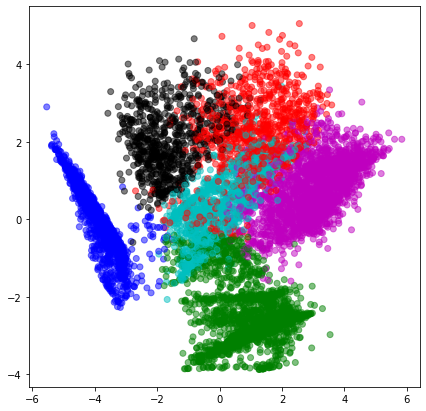

In [139]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)


In [141]:
cluster_df_6 = pd.concat([data_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [142]:
six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,27.872146,0.029398,11.905493,7.760575,34.663789,5.967143
Monthly_avg_purchase,140.096254,0.078945,47.384384,78.585295,211.196582,54.091602
Monthly_cash_advance,243.203509,184.574967,20.610894,3.603272,4.027720,205.502536
limit_usage,0.601147,0.575675,0.249683,0.245772,0.258206,0.605930
CASH_ADVANCE_TRX,10.044521,6.414458,0.546089,0.125212,0.150838,7.642857
payment_minpay,3.610482,9.980891,13.789513,6.911822,8.702974,3.257979
both_oneoff_and_installment,0.909817,0.000000,0.000000,0.006768,1.000000,0.000000
istallment,0.090183,0.015904,1.000000,0.000000,0.000000,0.000000
one_off,0.000000,0.000000,0.000000,0.993232,0.000000,1.000000
none,0.000000,0.984096,0.000000,0.000000,0.000000,0.000000


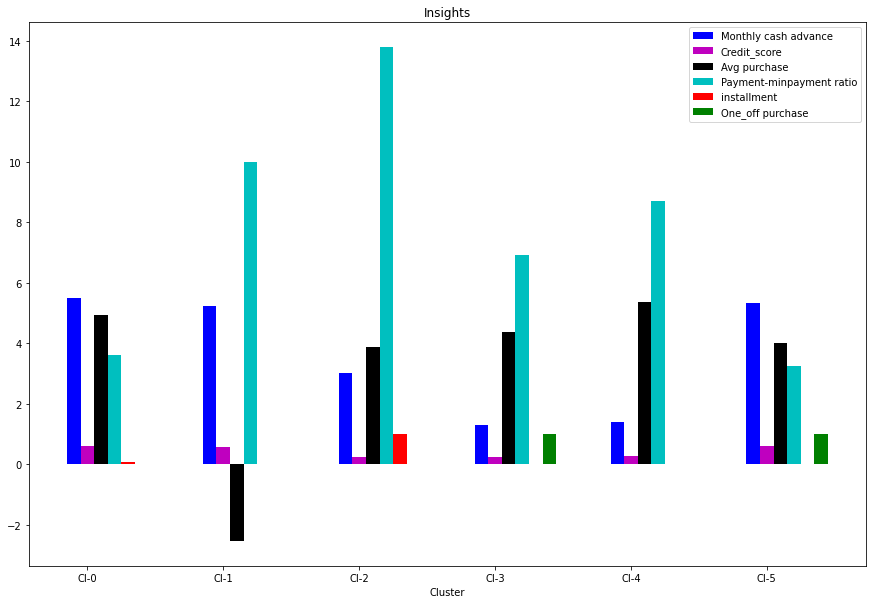

In [143]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['istallment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [145]:
cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=list(six_cluster.loc['limit_usage',:].values)
cash_advance

array([5.49389858, 5.21805571, 3.02581976, 1.28184245, 1.39320045,
       5.32545837])

### Conclusion with  6 clusters:

- Here also groups are overlapping.
     - Cl-0 and Cl-2 behaving same 


### Checking performance metrics for Kmeans
- I am validating performance with 2 metrics Calinski harabaz and Silhouette score

In [148]:
from sklearn.metrics import calinski_harabasz_score,silhouette_score

In [150]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
    score_c[n]=calinski_harabasz_score(reduced_cr,km_score.labels_)
    score[n]=silhouette_score(reduced_cr,km_score.labels_)

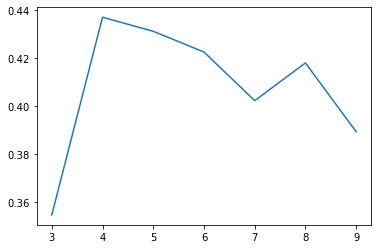

In [153]:
pd.Series(score).plot()

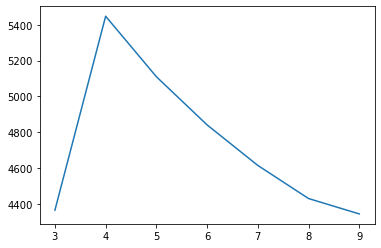

In [154]:
pd.Series(score_c).plot()

**Performance metrics also suggest that  K-means with 4 cluster is able to show distinguished characteristics of each cluster.**




***Insights with 4 Clusters***



- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. ***This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. ***This group is about 23% of the total customer base***



- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio and credit_score on lower side ***This group is about 21% of the total customer base***



- Cluster 3 customers have maximum credit score and  are paying dues and are doing maximum installment purchases.*** This group is about 25% of the total customer base***



### Marketing Strategy Suggested:

#### a. Group 2
   - They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score )
       --    we can increase credit limit or can lower down interest rate
       --    Can be given premium card /loyality cards to increase transactions
       
#### b. Group 1
   - They have poor credit score and taking only cash on advance. We can target them by providing  less interest rate on purchase transaction
   
#### c. Group 0
   - This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.
   
#### d. Group 3
  - This group is performing best among all as cutomers are maintaining good credit score and paying dues on time.
      -- Giving rewards point will make them perform more purchases.
       